In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

## Reading Data

In [2]:
df = pd.read_csv('weatherdata.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-01,NaN,47,37
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-02,NaN,38,17
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-03,NaN,20,12
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-04,NaN,36,16
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2008-01-05,NaN,43,32


## Looking At Temperature
Max and min temperature over all the days for the past 9 years (3988 days). <br>
Day 500:  05-15-2009 <br>
Day 1000: 09-27-2010 <br>
Day 1500: 02-09-2012 <br>
Day 2000: 06-23-2013 <br>
Day 2500: 11-05-2014 <br>
Day 3000: 03-19-2016 <br>
Day 3500: 08-01-2017 <br>
Day 3988: 12-01-2018

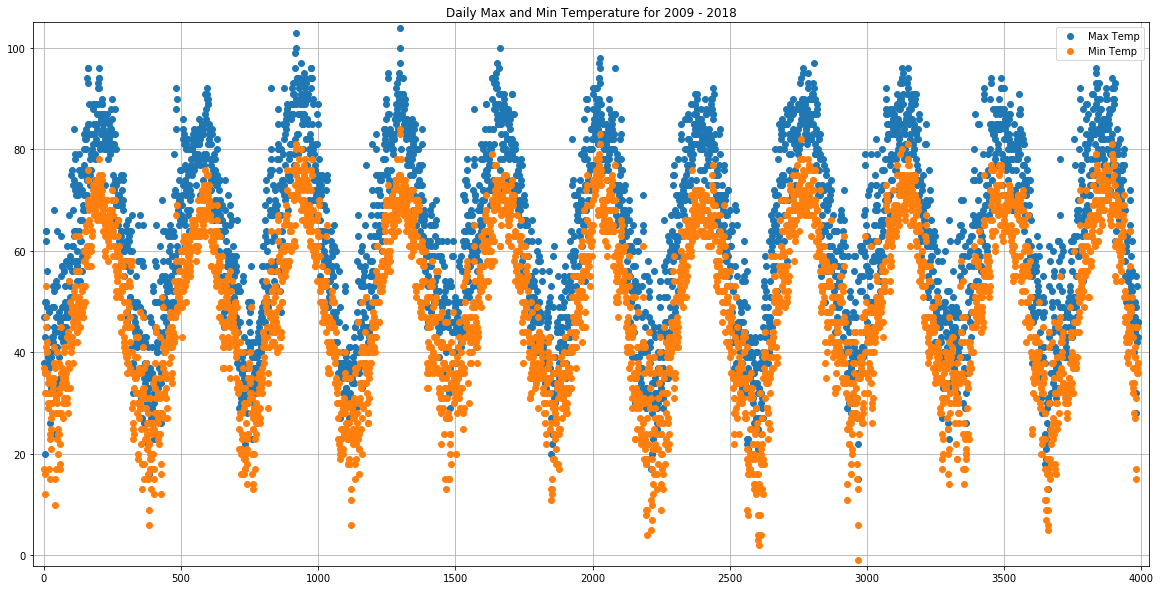

In [3]:
num = [i for i in range(1, df.shape[0] + 1)]
plt.figure(figsize = (20, 10))
plt.plot(num, df['TMAX'].values.reshape(3988, 1), 'o')
plt.plot(num, df['TMIN'].values.reshape(3988, 1), 'o')
plt.margins(0.01)
plt.grid()
plt.title('Daily Max and Min Temperature for 2009 - 2018')
plt.legend(['Max Temp', 'Min Temp'])

## Parsing for Yearly Data
Separating data into years from 2009 to 2018 (most of 2018).

In [4]:
avg2008 = df[df['DATE'].between('2008', '2009')]
avg2009 = df[df['DATE'].between('2009', '2010')]
avg2010 = df[df['DATE'].between('2010', '2011')]
avg2011 = df[df['DATE'].between('2011', '2012')]
avg2012 = df[df['DATE'].between('2012', '2013')]
avg2013 = df[df['DATE'].between('2013', '2014')]
avg2014 = df[df['DATE'].between('2014', '2015')]
avg2015 = df[df['DATE'].between('2015', '2016')]
avg2016 = df[df['DATE'].between('2016', '2017')]
avg2017 = df[df['DATE'].between('2017', '2018')]
avg2018 = df[df['DATE'] >= '2018-01']

Getting the average maximum and minimum temperature per year. The data is plotted to show the overall trend from year to year.

Year: 2008 	 MaxTemp: 62.88 	 MinTemp: 47.89
Year: 2009 	 MaxTemp: 61.00 	 MinTemp: 47.19
Year: 2010 	 MaxTemp: 63.98 	 MinTemp: 49.64
Year: 2011 	 MaxTemp: 63.74 	 MinTemp: 49.30
Year: 2012 	 MaxTemp: 64.39 	 MinTemp: 50.34
Year: 2013 	 MaxTemp: 62.38 	 MinTemp: 48.52
Year: 2014 	 MaxTemp: 61.67 	 MinTemp: 47.33
Year: 2015 	 MaxTemp: 64.31 	 MinTemp: 49.36
Year: 2016 	 MaxTemp: 64.63 	 MinTemp: 49.81
Year: 2017 	 MaxTemp: 63.25 	 MinTemp: 49.56
Year: 2018 	 MaxTemp: 64.19 	 MinTemp: 50.56


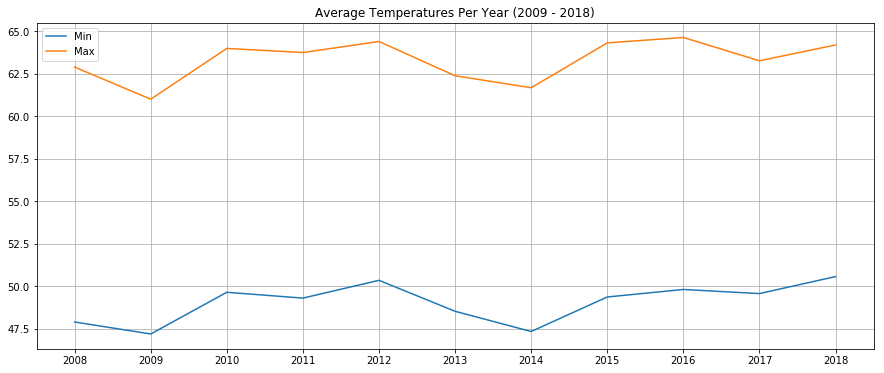

In [5]:
maxavg2008 = avg2008['TMAX'].values.mean()
maxavg2009 = avg2009['TMAX'].values.mean()
maxavg2010 = avg2010['TMAX'].values.mean()
maxavg2011 = avg2011['TMAX'].values.mean()
maxavg2012 = avg2012['TMAX'].values.mean()
maxavg2013 = avg2013['TMAX'].values.mean()
maxavg2014 = avg2014['TMAX'].values.mean()
maxavg2015 = avg2015['TMAX'].values.mean()
maxavg2016 = avg2016['TMAX'].values.mean()
maxavg2017 = avg2017['TMAX'].values.mean()
maxavg2018 = avg2018['TMAX'].values.mean()

yr = [i for i in range(2008, 2019)]
maxavg = [maxavg2008, maxavg2009, maxavg2010, maxavg2011, maxavg2012, 
          maxavg2013, maxavg2014, maxavg2015, maxavg2016, maxavg2017, maxavg2018]

minavg2008 = avg2008['TMIN'].values.mean()
minavg2009 = avg2009['TMIN'].values.mean()
minavg2010 = avg2010['TMIN'].values.mean()
minavg2011 = avg2011['TMIN'].values.mean()
minavg2012 = avg2012['TMIN'].values.mean()
minavg2013 = avg2013['TMIN'].values.mean()
minavg2014 = avg2014['TMIN'].values.mean()
minavg2015 = avg2015['TMIN'].values.mean()
minavg2016 = avg2016['TMIN'].values.mean()
minavg2017 = avg2017['TMIN'].values.mean()
minavg2018 = avg2018['TMIN'].values.mean()

#minyr = [i for i in range(2008, 2019)]
minavg = [minavg2008, minavg2009, minavg2010, minavg2011, minavg2012, 
          minavg2013, minavg2014, minavg2015, minavg2016, minavg2017, minavg2018]

plt.figure(figsize = (15, 6))
plt.plot(yr, minavg)
plt.plot(yr, maxavg)
plt.xticks(yr)
plt.grid()
plt.legend(['Min', 'Max'])
plt.title("Average Temperatures Per Year (2009 - 2018)")

for i in range(0, 11):
    print("Year: {0} \t MaxTemp: {1:0.2f} \t MinTemp: {2:0.2f}".format(yr[i], maxavg[i], minavg[i]))

## Results for Year Data:
1) Lowest temperatures are in 2009 and 2014. They were much colder than most other years. <br><br>
2) Possible trend involves a very cooler year (like 2009 and 2014). Then a rise for a few years to a peak and then fall in temperature for a few years towards another cooler year that has similar temperatures as those before it. <br><br>
3) 2019 could possibly be another increase with average temperatures at around 65 or decrease to around 63.5 <br><br>

<br><br>
Separating data into months (i.e. January 2008, January 2009, ... , January 2018 in one set). February is assumed to only be 28 days for all years.

Month: Jan	 MaxTemp: 38.86 	 MinTemp: 26.89
Month: Feb	 MaxTemp: 42.55 	 MinTemp: 28.93
Month: Mar	 MaxTemp: 50.16 	 MinTemp: 35.41
Month: Apr	 MaxTemp: 62.67 	 MinTemp: 45.68
Month: May	 MaxTemp: 72.23 	 MinTemp: 55.67
Month: Jun	 MaxTemp: 79.86 	 MinTemp: 64.06
Month: Jul	 MaxTemp: 85.77 	 MinTemp: 70.46
Month: Aug	 MaxTemp: 83.64 	 MinTemp: 68.78
Month: Sept	 MaxTemp: 77.18 	 MinTemp: 62.85
Month: Oct	 MaxTemp: 64.97 	 MinTemp: 51.72
Month: Nov	 MaxTemp: 53.92 	 MinTemp: 41.48
Month: Dec	 MaxTemp: 45.03 	 MinTemp: 33.93


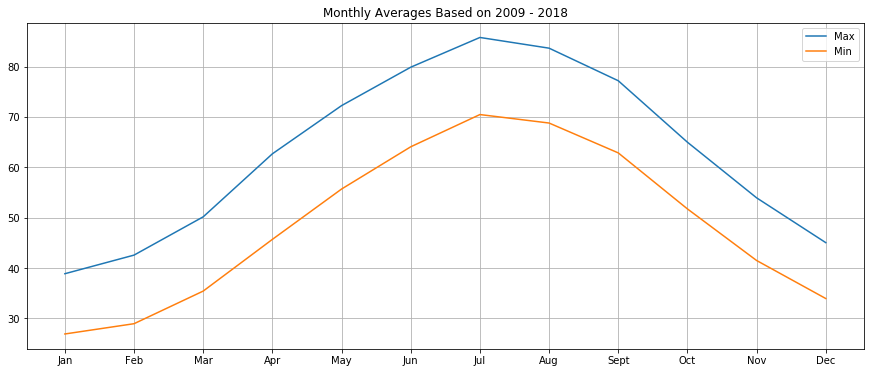

In [6]:
# January
dataJan = np.vstack((avg2008[:31], avg2009[:31], avg2010[:31], avg2011[:31], avg2012[:31], 
                    avg2013[:31], avg2014[:31], avg2015[:31], avg2016[:31], avg2017[:31], avg2018[:31]))
maxavgJan = dataJan[:, 7].mean()
minavgJan = dataJan[:, 8].mean()


# February
dataFeb = np.vstack((avg2008[31:59], avg2009[31:59], avg2010[31:59], avg2011[31:59], avg2012[31:59], 
                    avg2013[31:59], avg2014[31:59], avg2015[31:59], avg2016[31:59], avg2017[31:59], avg2018[31:59]))
maxavgFeb = dataFeb[:, 7].mean()
minavgFeb = dataFeb[:, 8].mean()


# March
dataMar = np.vstack((avg2008[60:91], avg2009[59:90], avg2010[59:90], avg2011[59:90], avg2012[60:91], 
                    avg2013[59:90], avg2014[59:90], avg2015[59:90], avg2016[60:91], avg2017[59:90], avg2018[59:90]))
maxavgMar = dataMar[:, 7].mean()
minavgMar = dataMar[:, 8].mean()


# April
dataApr = np.vstack((avg2008[91:121], avg2009[90:120], avg2010[90:120], avg2011[90:120], avg2012[91:121], 
                    avg2013[90:120], avg2014[90:120], avg2015[90:120], avg2016[91:121], avg2017[90:120], avg2018[90:120]))
maxavgApr = dataApr[:, 7].mean()
minavgApr = dataApr[:, 8].mean()


# May
dataMay = np.vstack((avg2008[121:152], avg2009[120:151], avg2010[120:151], avg2011[120:151], avg2012[121:152], 
                    avg2013[120:151], avg2014[120:151], avg2015[120:151], avg2016[121:152], avg2017[120:151], avg2018[120:151]))
maxavgMay = dataMay[:, 7].mean()
minavgMay = dataMay[:, 8].mean()


# June
dataJune = np.vstack((avg2008[152:182], avg2009[151:181], avg2010[151:181], avg2011[151:181], avg2012[152:182], 
                    avg2013[151:181], avg2014[151:181], avg2015[151:181], avg2016[152:182], avg2017[151:181], avg2018[151:181]))
maxavgJune = dataJune[:, 7].mean()
minavgJune = dataJune[:, 8].mean()


# July
dataJuly = np.vstack((avg2008[182:213], avg2009[181:212], avg2010[181:212], avg2011[181:212], avg2012[182:213], 
                    avg2013[181:212], avg2014[181:212], avg2015[181:212], avg2016[182:213], avg2017[181:212], avg2018[181:212]))
maxavgJuly = dataJuly[:, 7].mean()
minavgJuly = dataJuly[:, 8].mean()


# August
dataAug = np.vstack((avg2008[213:244], avg2009[212:243], avg2010[212:243], avg2011[212:243], avg2012[213:244], 
                    avg2013[212:243], avg2014[212:243], avg2015[212:243], avg2016[213:244], avg2017[212:243], avg2018[212:243]))
maxavgAug = dataAug[:, 7].mean()
minavgAug = dataAug[:, 8].mean()


# September
dataSept = np.vstack((avg2008[244:274], avg2009[243:273], avg2010[243:273], avg2011[243:273], avg2012[244:274], 
                    avg2013[243:273], avg2014[243:273], avg2015[243:273], avg2016[244:274], avg2017[243:273], avg2018[243:273]))
maxavgSept = dataSept[:, 7].mean()
minavgSept = dataSept[:, 8].mean()


# October
dataOct = np.vstack((avg2008[274:305], avg2009[273:304], avg2010[273:304], avg2011[273:304], avg2012[274:305], 
                    avg2013[273:304], avg2014[273:304], avg2015[273:304], avg2016[274:305], avg2017[273:304], avg2018[273:304]))
maxavgOct = dataOct[:, 7].mean()
minavgOct = dataOct[:, 8].mean()


# November
dataNov = np.vstack((avg2008[305:335], avg2009[304:334], avg2010[304:334], avg2011[304:334], avg2012[305:335], 
                    avg2013[304:334], avg2014[304:334], avg2015[304:334], avg2016[305:335], avg2017[304:334], avg2018[304:334]))
maxavgNov = dataNov[:, 7].mean()
minavgNov = dataNov[:, 8].mean()


# December
dataDec = np.vstack((avg2008[-31:], avg2009[-31:], avg2010[-31:], avg2011[-31:], avg2012[-31:], 
                    avg2013[-31:], avg2014[-31:], avg2015[-31:], avg2016[-31:], avg2017[-31:]))
maxavgDec = dataDec[:, 7].mean()
minavgDec = dataDec[:, 8].mean()


x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ymax = [maxavgJan, maxavgFeb, maxavgMar, maxavgApr, maxavgMay, maxavgJune, maxavgJuly, maxavgAug, maxavgSept, maxavgOct,
        maxavgNov, maxavgDec]
ymin = [minavgJan, minavgFeb, minavgMar, minavgApr, minavgMay, minavgJune, minavgJuly, minavgAug, minavgSept, minavgOct,
        minavgNov, minavgDec]
plt.figure(figsize = (15, 6))
plt.plot(x, ymax)
plt.plot(x, ymin)
plt.grid()
plt.legend(['Max', 'Min'])
plt.title("Monthly Averages Based on 2009 - 2018")

for i in range(0, len(x)):
    print("Month: " + x[i] + "\t MaxTemp: {0:.2f} \t MinTemp: {1:.2f}".format(ymax[i], ymin[i]))

## January Data

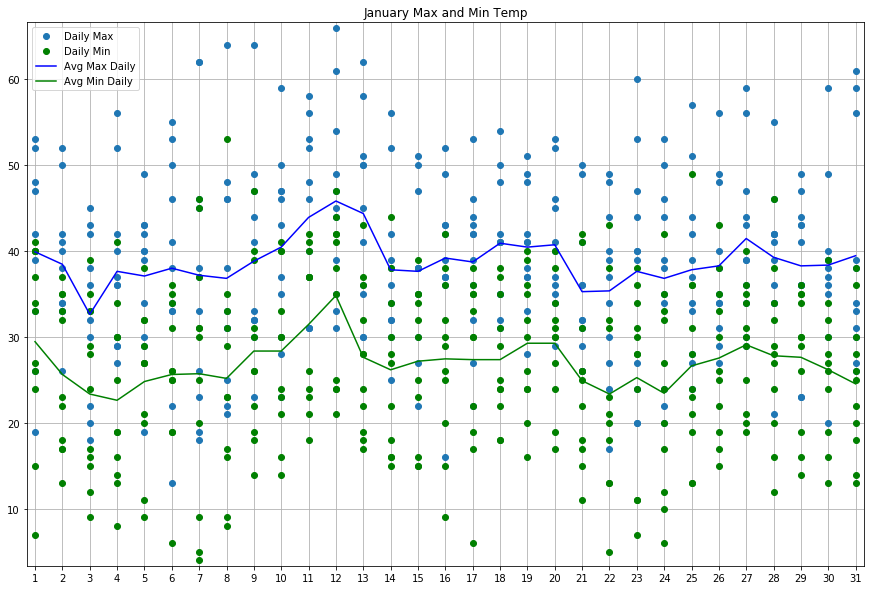

In [7]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allJan = day
for i in range(2009, 2019):
    allJan = np.vstack((allJan, day))
    
maxAvgJan = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgJan[i] = maxAvgJan[i] + dataJan[31 * (j - 2008) + i, 7]
dayJan = [[j] for j in range(1, 32)]
maxAvgJan = maxAvgJan / 11

minAvgJan = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgJan[i] = minAvgJan[i] + dataJan[31 * (j - 2008) + i, 8]
minAvgJan = minAvgJan / 11

plt.figure(figsize = (15, 10))
plt.plot(allJan, dataJan[:, 7], 'o')
plt.plot(allJan, dataJan[:, 8], 'go')
plt.plot(dayJan, maxAvgJan, 'b-')
plt.plot(dayJan, minAvgJan, 'g-')
plt.title("January Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayJan)
plt.margins(0.01)
plt.grid()

## February Data

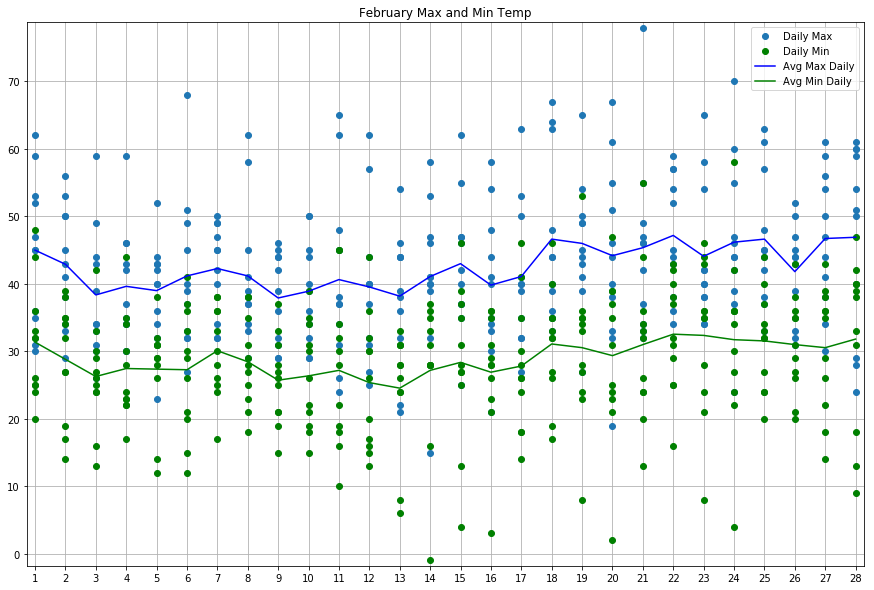

In [8]:
day = [1]
for i in range(2, 29):
    day = np.vstack((day, [i]))
allFeb = day
for i in range(2009, 2019):
    allFeb = np.vstack((allFeb, day))
    
maxAvgFeb = np.zeros((28, 1))
for i in range(0, 28):
    for j in range(2008, 2019):
        maxAvgFeb[i] = maxAvgFeb[i] + dataFeb[28 * (j - 2008) + i, 7]
dayFeb = [[j] for j in range(1, 29)]
maxAvgFeb = maxAvgFeb / 11

minAvgFeb = np.zeros((28, 1))
for i in range(0, 28):
    for j in range(2008, 2019):
        minAvgFeb[i] = minAvgFeb[i] + dataFeb[28 * (j - 2008) + i, 8]
minAvgFeb = minAvgFeb / 11

plt.figure(figsize = (15, 10))
plt.plot(allFeb, dataFeb[:, 7], 'o')
plt.plot(allFeb, dataFeb[:, 8], 'go')
plt.plot(dayFeb, maxAvgFeb, 'b-')
plt.plot(dayFeb, minAvgFeb, 'g-')
plt.title("February Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayFeb)
plt.margins(0.01)
plt.grid()

## March Data

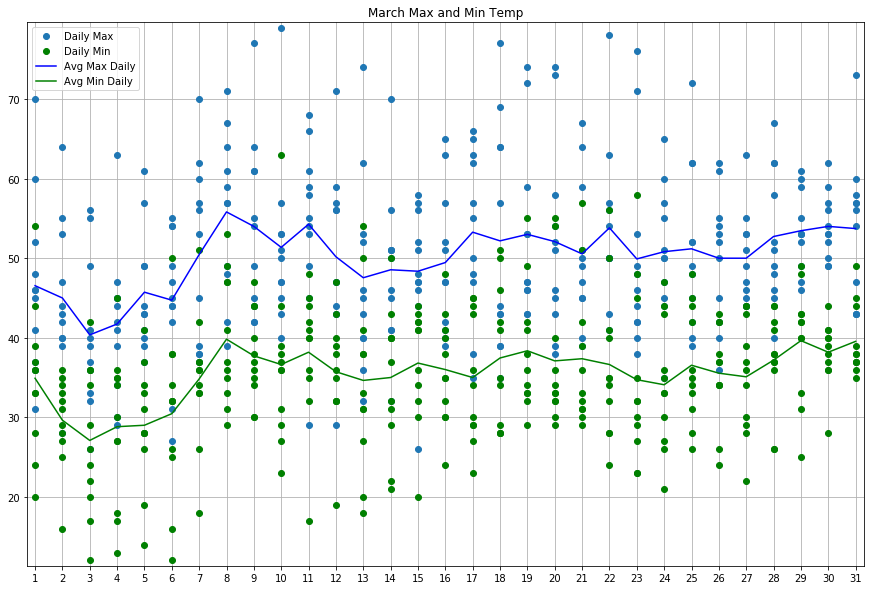

In [9]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allMar = day
for i in range(2009, 2019):
    allMar = np.vstack((allMar, day))
    
maxAvgMar = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgMar[i] = maxAvgMar[i] + dataMar[31 * (j - 2008) + i, 7]
dayMar = [[j] for j in range(1, 32)]
maxAvgMar = maxAvgMar / 11

minAvgMar = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgMar[i] = minAvgMar[i] + dataMar[31 * (j - 2008) + i, 8]
minAvgMar = minAvgMar / 11

plt.figure(figsize = (15, 10))
plt.plot(allMar, dataMar[:, 7], 'o')
plt.plot(allMar, dataMar[:, 8], 'go')
plt.plot(dayMar, maxAvgMar, 'b-')
plt.plot(dayMar, minAvgMar, 'g-')
plt.title("March Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayMar)
plt.margins(0.01)
plt.grid()

## April Data

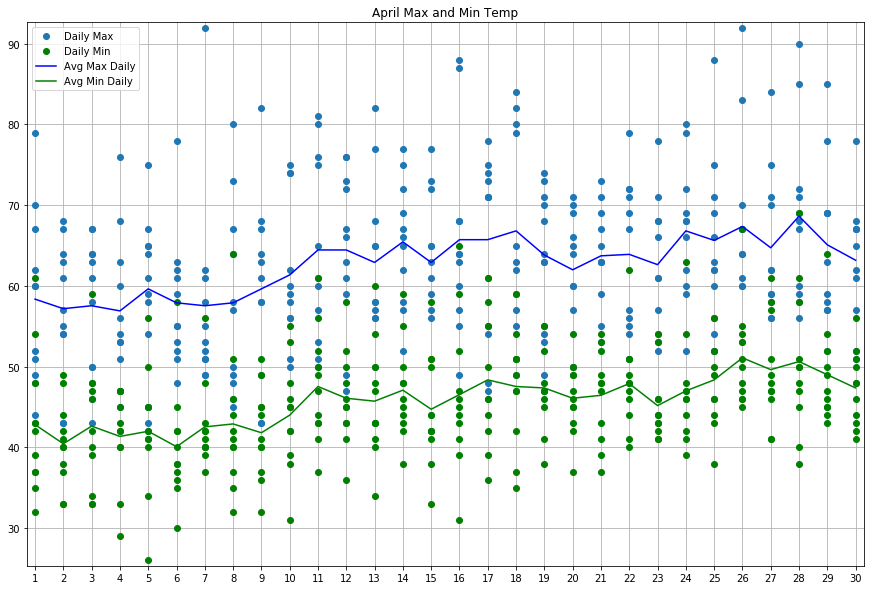

In [10]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))
allApr = day
for i in range(2009, 2019):
    allApr = np.vstack((allApr, day))
    
maxAvgApr = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        maxAvgApr[i] = maxAvgApr[i] + dataApr[30 * (j - 2008) + i, 7]
dayApr = [[j] for j in range(1, 31)]
maxAvgApr = maxAvgApr / 11

minAvgApr = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        minAvgApr[i] = minAvgApr[i] + dataApr[30 * (j - 2008) + i, 8]
minAvgApr = minAvgApr / 11

plt.figure(figsize = (15, 10))
plt.plot(allApr, dataApr[:, 7], 'o')
plt.plot(allApr, dataApr[:, 8], 'go')
plt.plot(dayApr, maxAvgApr, 'b-')
plt.plot(dayApr, minAvgApr, 'g-')
plt.title("April Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayApr)
plt.margins(0.01)
plt.grid()

## May Data

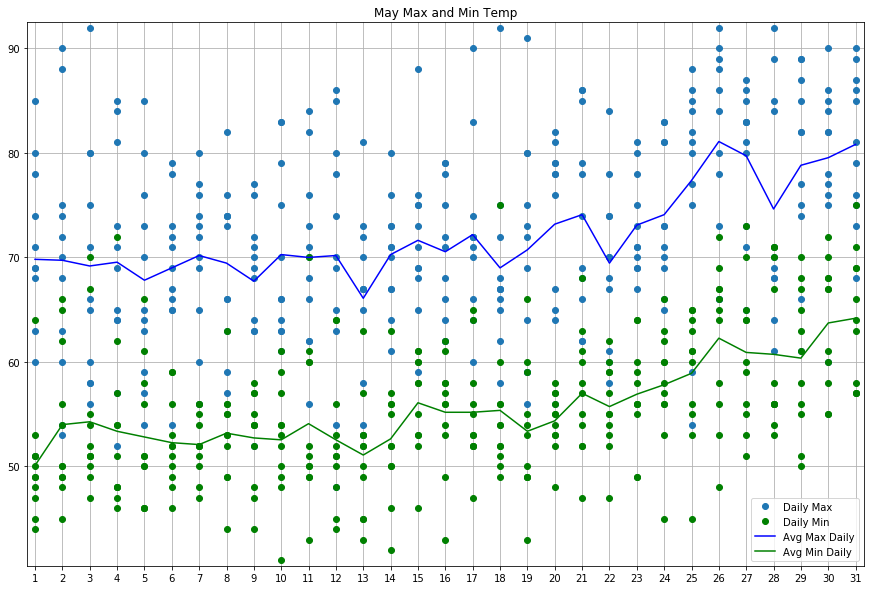

In [11]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allMay = day
for i in range(2009, 2019):
    allMay = np.vstack((allMay, day))
    
maxAvgMay = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgMay[i] = maxAvgMay[i] + dataMay[31 * (j - 2008) + i, 7]
dayMay = [[j] for j in range(1, 32)]
maxAvgMay = maxAvgMay / 11

minAvgMay = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgMay[i] = minAvgMay[i] + dataMay[31 * (j - 2008) + i, 8]
minAvgMay = minAvgMay / 11

plt.figure(figsize = (15, 10))
plt.plot(allMay, dataMay[:, 7], 'o')
plt.plot(allMay, dataMay[:, 8], 'go')
plt.plot(dayMay, maxAvgMay, 'b-')
plt.plot(dayMay, minAvgMay, 'g-')
plt.title("May Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayMay)
plt.margins(0.01)
plt.grid()

## June Data

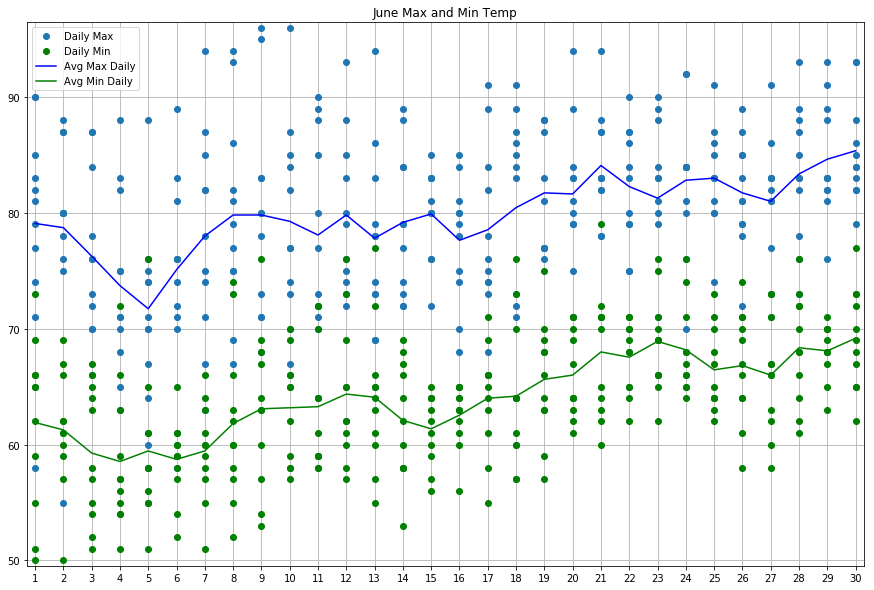

In [12]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))
allJune = day
for i in range(2009, 2019):
    allJune = np.vstack((allJune, day))
    
maxAvgJune = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        maxAvgJune[i] = maxAvgJune[i] + dataJune[30 * (j - 2008) + i, 7]
dayJune = [[j] for j in range(1, 31)]
maxAvgJune = maxAvgJune / 11

minAvgJune = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        minAvgJune[i] = minAvgJune[i] + dataJune[30 * (j - 2008) + i, 8]
minAvgJune = minAvgJune / 11

plt.figure(figsize = (15, 10))
plt.plot(allJune, dataJune[:, 7], 'o')
plt.plot(allJune, dataJune[:, 8], 'go')
plt.plot(dayJune, maxAvgJune, 'b-')
plt.plot(dayJune, minAvgJune, 'g-')
plt.title("June Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayJune)
plt.margins(0.01)
plt.grid()

## July Data

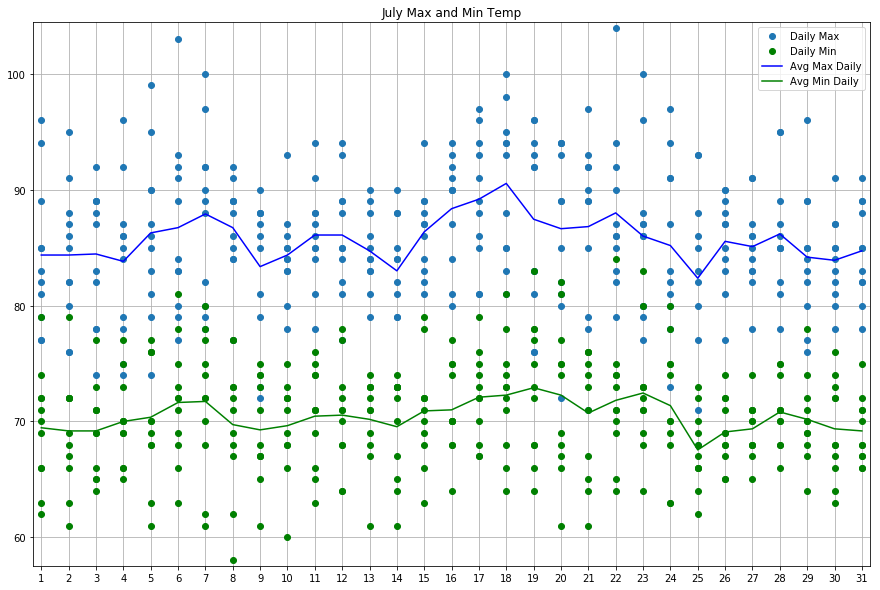

In [13]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allJuly = day
for i in range(2009, 2019):
    allJuly = np.vstack((allJuly, day))
    
maxAvgJuly = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgJuly[i] = maxAvgJuly[i] + dataJuly[31 * (j - 2008) + i, 7]
dayJuly = [[j] for j in range(1, 32)]
maxAvgJuly = maxAvgJuly / 11

minAvgJuly = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgJuly[i] = minAvgJuly[i] + dataJuly[31 * (j - 2008) + i, 8]
minAvgJuly = minAvgJuly / 11

plt.figure(figsize = (15, 10))
plt.plot(allJuly, dataJuly[:, 7], 'o')
plt.plot(allJuly, dataJuly[:, 8], 'go')
plt.plot(dayJuly, maxAvgJuly, 'b-')
plt.plot(dayJuly, minAvgJuly, 'g-')
plt.title("July Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayJuly)
plt.margins(0.01)
plt.grid()

## August Data

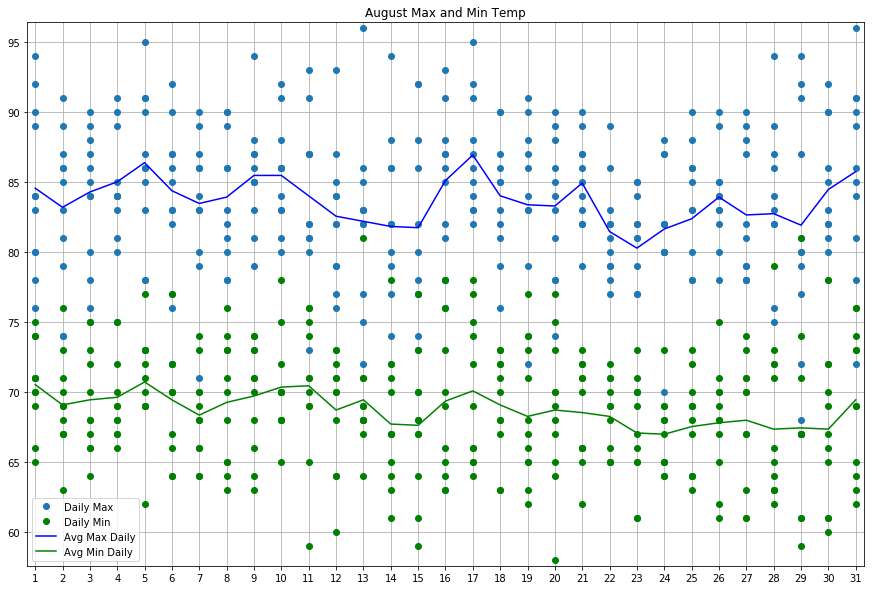

In [14]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allAug = day
for i in range(2009, 2019):
    allAug = np.vstack((allAug, day))
    
maxAvgAug = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgAug[i] = maxAvgAug[i] + dataAug[31 * (j - 2008) + i, 7]
dayAug = [[j] for j in range(1, 32)]
maxAvgAug = maxAvgAug / 11

minAvgAug = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgAug[i] = minAvgAug[i] + dataAug[31 * (j - 2008) + i, 8]
minAvgAug = minAvgAug / 11

plt.figure(figsize = (15, 10))
plt.plot(allAug, dataAug[:, 7], 'o')
plt.plot(allAug, dataAug[:, 8], 'go')
plt.plot(dayAug, maxAvgAug, 'b-')
plt.plot(dayAug, minAvgAug, 'g-')
plt.title("August Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayAug)
plt.margins(0.01)
plt.grid()

## September Data

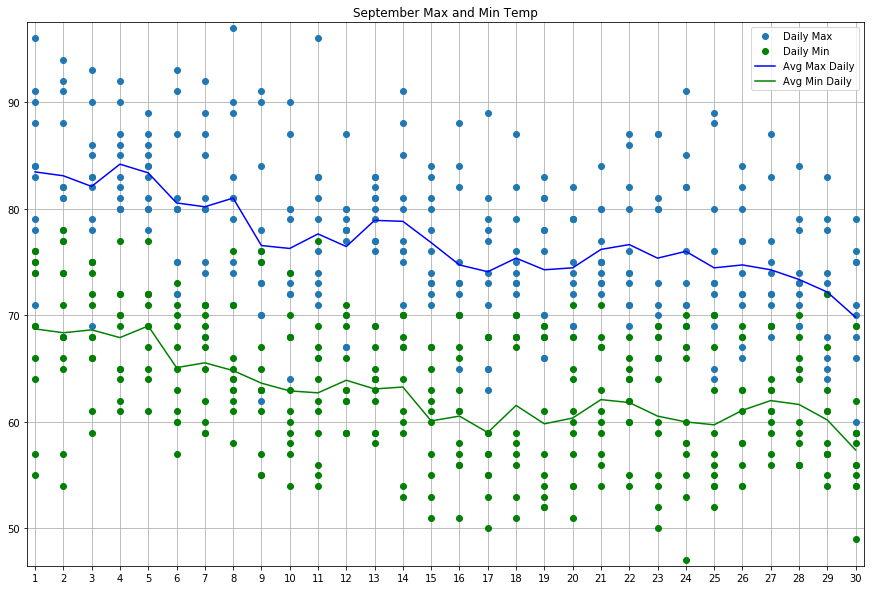

In [15]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))
allSept = day
for i in range(2009, 2019):
    allSept = np.vstack((allSept, day))
    
maxAvgSept = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        maxAvgSept[i] = maxAvgSept[i] + dataSept[30 * (j - 2008) + i, 7]
daySept = [[j] for j in range(1, 31)]
maxAvgSept = maxAvgSept / 11

minAvgSept = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        minAvgSept[i] = minAvgSept[i] + dataSept[30 * (j - 2008) + i, 8]
minAvgSept = minAvgSept / 11

plt.figure(figsize = (15, 10))
plt.plot(allSept, dataSept[:, 7], 'o')
plt.plot(allSept, dataSept[:, 8], 'go')
plt.plot(daySept, maxAvgSept, 'b-')
plt.plot(daySept, minAvgSept, 'g-')
plt.title("September Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(daySept)
plt.margins(0.01)
plt.grid()

## October Data

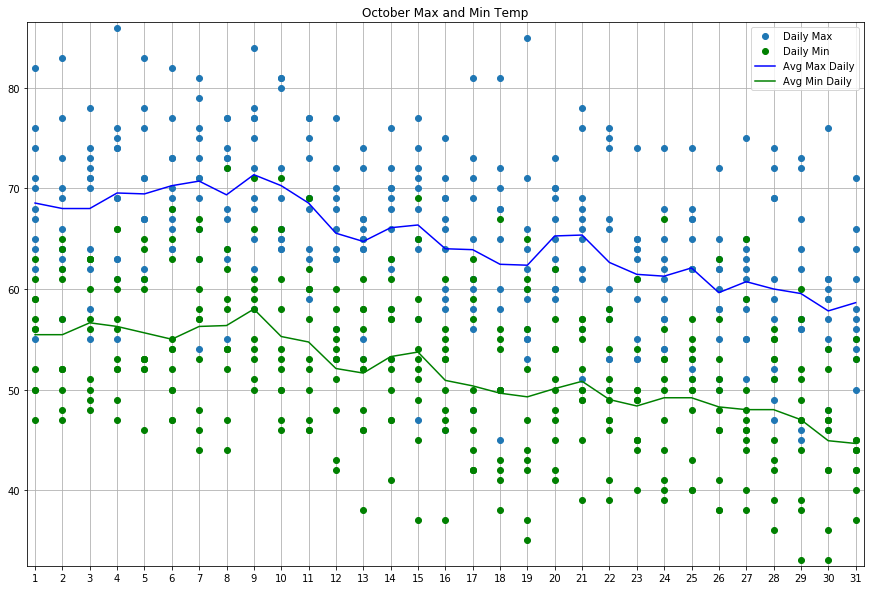

In [16]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allOct = day
for i in range(2009, 2019):
    allOct = np.vstack((allOct, day))
    
maxAvgOct = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        maxAvgOct[i] = maxAvgOct[i] + dataOct[31 * (j - 2008) + i, 7]
dayOct = [[j] for j in range(1, 32)]
maxAvgOct = maxAvgOct / 11

minAvgOct = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2019):
        minAvgOct[i] = minAvgOct[i] + dataOct[31 * (j - 2008) + i, 8]
minAvgOct = minAvgOct / 11

plt.figure(figsize = (15, 10))
plt.plot(allOct, dataOct[:, 7], 'o')
plt.plot(allOct, dataOct[:, 8], 'go')
plt.plot(dayOct, maxAvgOct, 'b-')
plt.plot(dayOct, minAvgOct, 'g-')
plt.title("October Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayOct)
plt.margins(0.01)
plt.grid()

## November Data

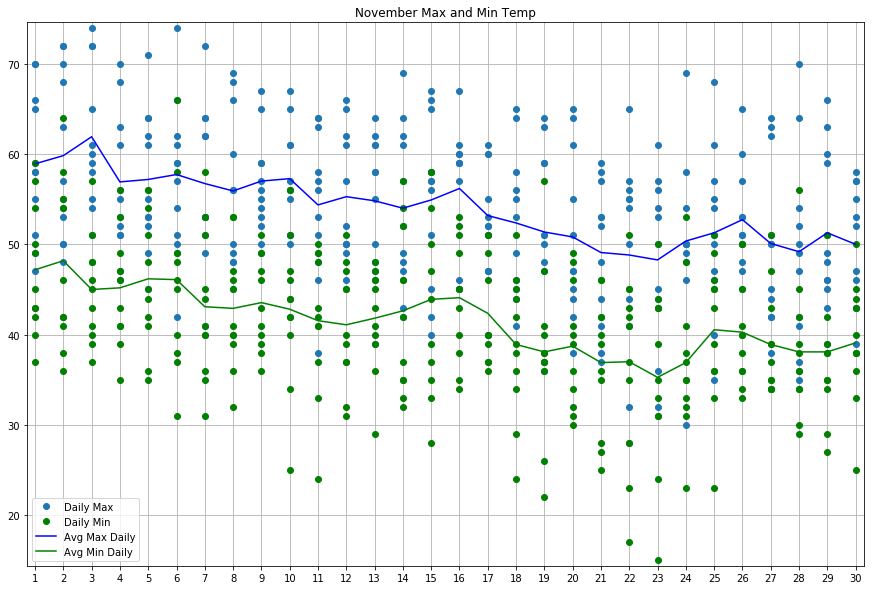

In [17]:
day = [1]
for i in range(2, 31):
    day = np.vstack((day, [i]))
allNov = day
for i in range(2009, 2019):
    allNov = np.vstack((allNov, day))
    
maxAvgNov = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        maxAvgNov[i] = maxAvgNov[i] + dataNov[30 * (j - 2008) + i, 7]
dayNov = [[j] for j in range(1, 31)]
maxAvgNov = maxAvgNov / 11

minAvgNov = np.zeros((30, 1))
for i in range(0, 30):
    for j in range(2008, 2019):
        minAvgNov[i] = minAvgNov[i] + dataNov[30 * (j - 2008) + i, 8]
minAvgNov = minAvgNov / 11

plt.figure(figsize = (15, 10))
plt.plot(allNov, dataNov[:, 7], 'o')
plt.plot(allNov, dataNov[:, 8], 'go')
plt.plot(dayNov, maxAvgNov, 'b-')
plt.plot(dayNov, minAvgNov, 'g-')
plt.title("November Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayNov)
plt.margins(0.01)
plt.grid()

## December Data

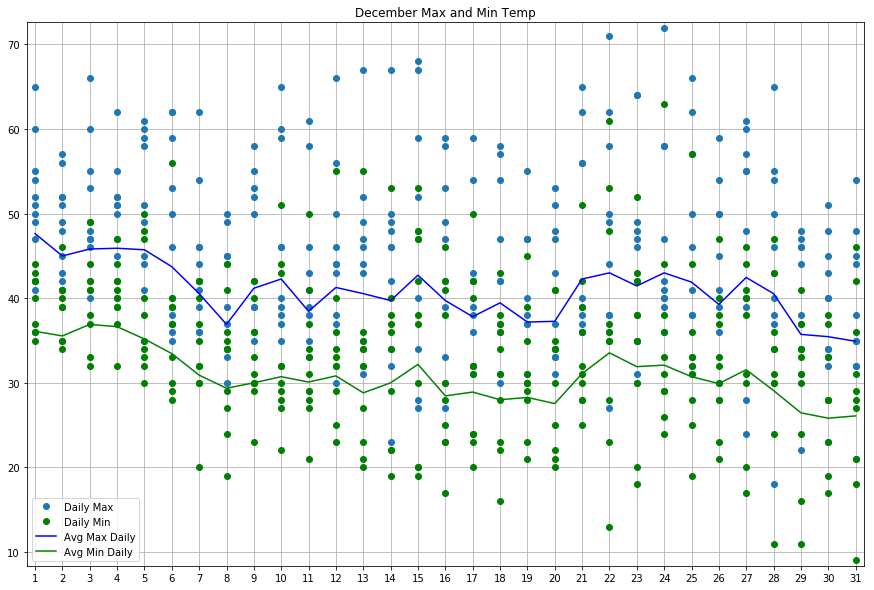

In [18]:
day = [1]
for i in range(2, 32):
    day = np.vstack((day, [i]))
allDec = day
for i in range(2009, 2018):
    allDec = np.vstack((allDec, day))
    
maxAvgDec = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2018):
        maxAvgDec[i] = maxAvgDec[i] + dataDec[31 * (j - 2008) + i, 7]
dayDec = [[j] for j in range(1, 32)]
maxAvgDec = maxAvgDec / 11

minAvgDec = np.zeros((31, 1))
for i in range(0, 31):
    for j in range(2008, 2018):
        minAvgDec[i] = minAvgDec[i] + dataDec[31 * (j - 2008) + i, 8]
minAvgDec = minAvgDec / 11

plt.figure(figsize = (15, 10))
plt.plot(allDec, dataDec[:, 7], 'o')
plt.plot(allDec, dataDec[:, 8], 'go')
plt.plot(dayDec, maxAvgDec, 'b-')
plt.plot(dayDec, minAvgDec, 'g-')
plt.title("December Max and Min Temp")
plt.legend(['Daily Max','Daily Min', 'Avg Max Daily', 'Avg Min Daily'])
plt.xticks(dayDec)
plt.margins(0.01)
plt.grid()

## Results
There exists multiple days throughout each month where the temperature is more than often not higher than the previous day. Of course, weather occurs in cycles and more data is needed to confirm changes based on other factors (pressure, humidity, wind, etc.). However, it is possible that a certain deviation from a "normal" day (have to define typical status in temperature and other factors) exists on the current day, then the next day would try to return to that normal.

## Some Future Work To Consider
1) Show deviation for daily temperatures for the graphs above instead of the raw temperature. This will more clearly show how often a day is above some type of average. <br>
2) More intensive data with many weather factors